<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                55 non-null     object 
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        55 non-null     object 
 9   Gender                     55 non-null     object 
 10  BMI                        55 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
dtypes

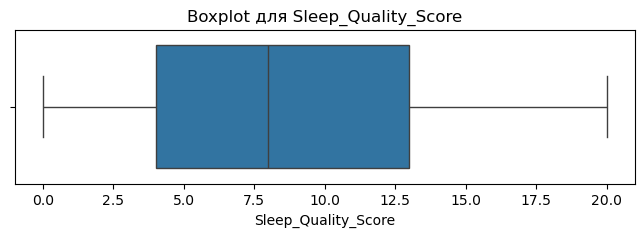

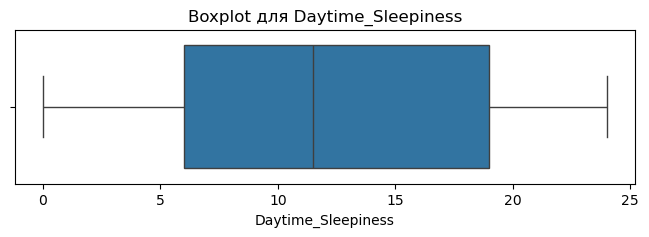

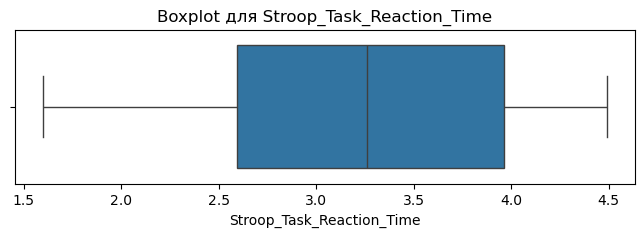

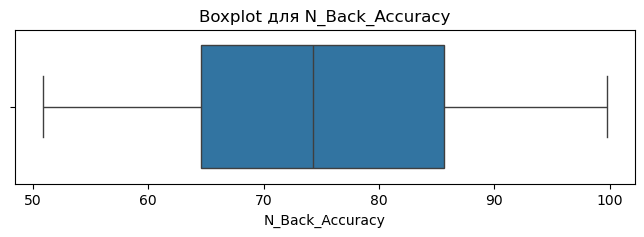

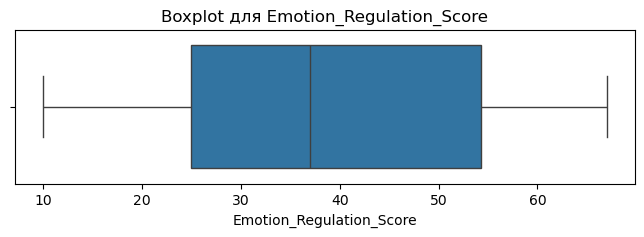

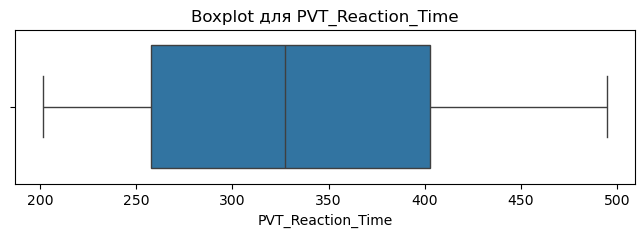

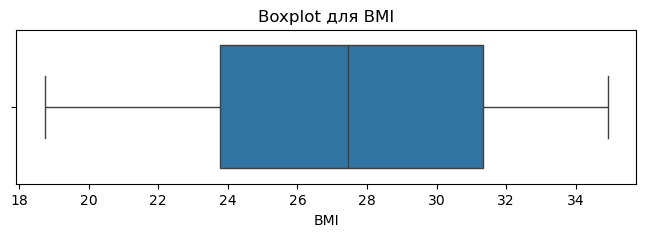

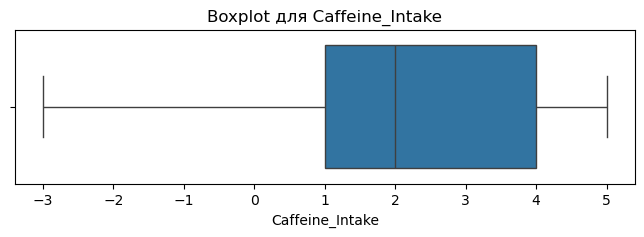

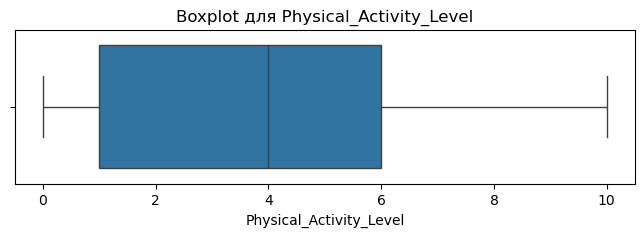

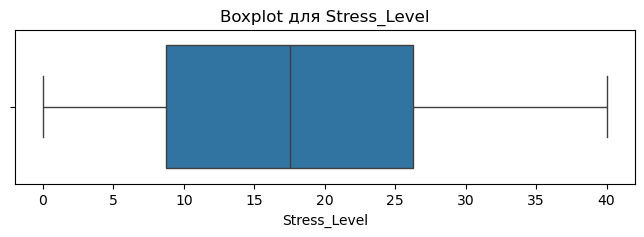

In [1]:

import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
!pip install streamlit pandas scikit-learn matplotlib seaborn

# –ü—É—Ç–∏ –∫ —Ñ–∞–π–ª–∞–º
input_path = Path("sleep_deprivation_unprepared.csv")
output_path = Path("cleaned_data.csv")

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv(input_path)
df = df.drop_duplicates()

# EDA
df.head()
df.info()

# –ü–æ–∏—Å–∫ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –≤—Å–µ–º —á–∏—Å–ª–æ–≤—ã–º —Å—Ç–æ–ª–±—Ü–∞–º
numeric_columns = df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot –¥–ª—è {col}")
    plt.show()


In [2]:
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Sleep_Hours'] = pd.to_numeric(df['Sleep_Hours'], errors='coerce')
df = df.dropna(subset=['Sleep_Hours'])
df = df[df['Caffeine_Intake'] >= 0]
df['BMI_Low'] = (df['BMI'] < 18.5).astype(int)
df['BMI_Normal'] = ((df['BMI'] >= 18.5) & (df['BMI'] < 25)).astype(int)
df['BMI_High'] = (df['BMI'] >= 30).astype(int)
df = df.dropna()
df.to_csv(output_path, index=False)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1 to 59
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             39 non-null     object 
 1   Sleep_Hours                39 non-null     float64
 2   Sleep_Quality_Score        39 non-null     int64  
 3   Daytime_Sleepiness         39 non-null     int64  
 4   Stroop_Task_Reaction_Time  39 non-null     float64
 5   N_Back_Accuracy            39 non-null     float64
 6   Emotion_Regulation_Score   39 non-null     int64  
 7   PVT_Reaction_Time          39 non-null     float64
 8   Age                        39 non-null     float64
 9   Gender                     39 non-null     object 
 10  BMI                        39 non-null     float64
 11  Caffeine_Intake            39 non-null     int64  
 12  Physical_Activity_Level    39 non-null     int64  
 13  Stress_Level               39 non-null     int64  
 14  B

Sleep_Hours  Sleep_Quality_Score  Daytime_Sleepiness  \
count    39.000000            39.000000           39.000000   
mean      5.877949             7.333333           11.923077   
std       1.948152             5.681611            8.180158   
min       3.210000             0.000000            0.000000   
25%       4.100000             2.000000            4.500000   
50%       5.740000             7.000000           11.000000   
75%       7.680000            12.000000           19.000000   
max       8.820000            19.000000           24.000000   

       Stroop_Task_Reaction_Time  N_Back_Accuracy  Emotion_Regulation_Score  \
count                  39.000000        39.000000                 39.000000   
mean                    3.402564        75.251538                 37.641026   
std                     0.766248        13.686222                 16.664629   
min                     1.790000        52.180000                 10.000000   
25%                     2.705000        64.625000                 25.000000   
50%                     3.540000        74.340000                 35.000000   
75%                     4.060000        85.750000                 45.500000   
max                     4.490000        99.730000                 67.000000   

       PVT_Reaction_Time        Age        BMI  Caffeine_Intake  \
count          39.000000  39.000000  39.000000        39.000000   
mean          350.945128  30.153846  27.497436         2.538462   
std            87.382861   8.658851   4.546064         1.699011   
min           211.650000  18.000000  19.280000         0.000000   
25%           279.160000  21.500000  24.190000         1.000000   
50%           332.710000  29.000000  27.280000         3.000000   
75%           421.110000  38.000000  30.845000         4.000000   
max           494.550000  43.000000  34.930000         5.000000   

       Physical_Activity_Level  Stress_Level  BMI_Low  BMI_Normal   BMI_High  
count                39.000000     39.000000     39.0   39.000000  39.000000  
mean                  3.897436     17.974359      0.0    0.358974   0.358974  
std                   3.393452     10.596641      0.0    0.485971   0.485971  
min                   0.000000      1.000000      0.0    0.000000   0.000000  
25%                   1.000000     10.000000      0.0    0.000000   0.000000  
50%                   3.000000     18.000000      0.0    0.000000   0.000000  
75%                   6.500000     25.500000      0.0    1.000000   1.000000  
max                  10.000000     39.000000      0.0    1.000000   1.000000

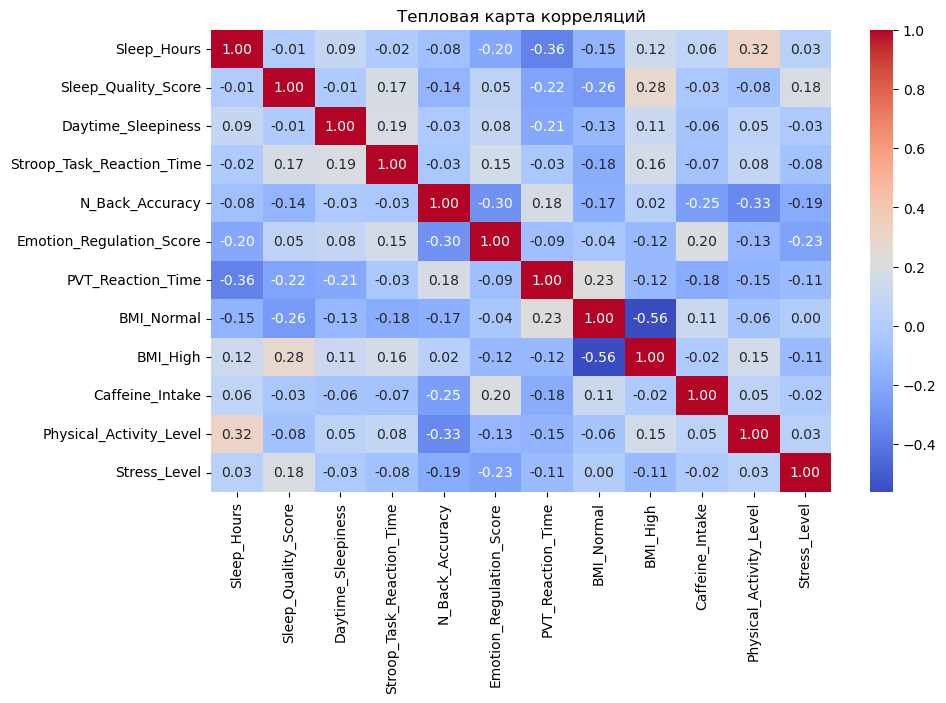

In [3]:
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞
corr = df[['Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness',
           'Stroop_Task_Reaction_Time', 'N_Back_Accuracy', 'Emotion_Regulation_Score',
           'PVT_Reaction_Time', 'BMI_Normal', 'BMI_High', 'Caffeine_Intake',
           'Physical_Activity_Level', 'Stress_Level']].corr()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ç–µ–ø–ª–æ–≤–æ–π –∫–∞—Ä—Ç—ã
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π")
plt.show()


–û—Å–Ω–æ–≤–Ω—ã–µ –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏:
1. –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É Sleep_Hours –∏ PVT_Reaction_time (-0.36): —á–µ–º –±–æ–ª—å—à–µ —á–µ–ª–æ–≤–µ–∫ —Å–ø–∏—Ç, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ –µ–≥–æ —Ä–µ–∞–∫—Ü–∏—è
2. –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É Physical_Activity_level –∏ N_Bank_Accuracy (-0.33): —á–µ–º –±–æ–ª—å—à–µ —Ñ–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å, —Ç–µ–º —Ö—É–∂–µ —É —á–µ–ª–æ–≤–µ–∫–∞ —Ä–∞–±–æ—á–∞—è –ø–∞–º—è—Ç—å –∏ –≤–Ω–∏–º–∞–Ω–∏–µ
3. –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É BMI_Normal –∏ Sleep_Quality_Score (-0.26): —É –ª—é–¥–µ–π —Å –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π –º–∞—Å—Å–æ–π —Ç–µ–ª–∞ —Ö—É–∂–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞
4. –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É Caffeine_Intake –∏ N_Back_Accuracy (-0.25): —á–µ–º –±–æ–ª—å—à–µ –≤—ã–ø–∏—Ç—ã—Ö –∫—Ä—É–∂–µ–∫ –∫–æ—Ñ–µ –≤ –¥–µ–Ω—å, —Ç–µ–º —Ö—É–∂–µ —Ä–∞–±–æ—á–∞—è –ø–∞–º—è—Ç—å –∏ –≤–Ω–∏–º–∞–Ω–∏–µ
5. –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É Physical_Activity_level –∏ Sleep_hours (0.32): —á–µ–º –±–æ–ª—å—à–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, —Ç–µ–º –±–æ–ª—å—à–µ —á–∞—Å–æ–≤ —Å–Ω–∞
6. –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É BMI_High –∏ Sleep_Quality_Score (0.28): —á–µ–º –≤—ã—à–µ –º–∞—Å—Å–∞ —Ç–µ–ª–∞ (–≤—ã—à–µ –Ω–æ—Ä–º—ã), —Ç–µ–º –ª—É—á—à–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞

–ü–æ–º–∏–º–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ—á–µ–≤–∏–¥–Ω—ã—Ö –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–µ–π –ø–æ–ª—É—á–∏–ª–∏—Å—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏—è:
 - —á–µ–º –±–æ–ª—å—à–µ —Ñ–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å, —Ç–µ–º —Ö—É–∂–µ —É —á–µ–ª–æ–≤–µ–∫–∞ —Ä–∞–±–æ—á–∞—è –ø–∞–º—è—Ç—å –∏ –≤–Ω–∏–º–∞–Ω–∏–µ
 - —É –ª—é–¥–µ–π —Å –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π –º–∞—Å—Å–æ–π —Ç–µ–ª–∞ —Ö—É–∂–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞
 - —á–µ–º –≤—ã—à–µ –º–∞—Å—Å–∞ —Ç–µ–ª–∞ (–≤—ã—à–µ –Ω–æ—Ä–º—ã), —Ç–µ–º –ª—É—á—à–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞



–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —ç—Ç—É –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å:
—á–µ–º –±–æ–ª—å—à–µ —Ñ–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å, —Ç–µ–º —Ö—É–∂–µ —É —á–µ–ª–æ–≤–µ–∫–∞ —Ä–∞–±–æ—á–∞—è –ø–∞–º—è—Ç—å –∏ –≤–Ω–∏–º–∞–Ω–∏–µ

–ì–∏–ø–æ—Ç–µ–∑–∞: –í–æ–∑–º–æ–∂–Ω–æ, –≤—ã—Å–æ–∫–∞—è —Ñ–∏–∑–Ω–∞–≥—Ä—É–∑–∫–∞ –≤—ã–∑—ã–≤–∞–µ—Ç —É—Ç–æ–º–ª–µ–Ω–∏–µ –∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –≤–Ω–∏–º–∞–Ω–∏—è


–ü–æ–ø—Ä–æ–±—É—é —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –ª—é–¥–µ–π –ø–æ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∏ –∑–∞—Ç–µ–º —Å—Ä–∞–≤–Ω–∏—Ç—å –∏–∑ –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º N_Back_Accuracy


C:\Users\Polina\AppData\Local\Temp\ipykernel_9024\1741727440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Activity_Level_Group', y='N_Back_Accuracy', palette='pastel')


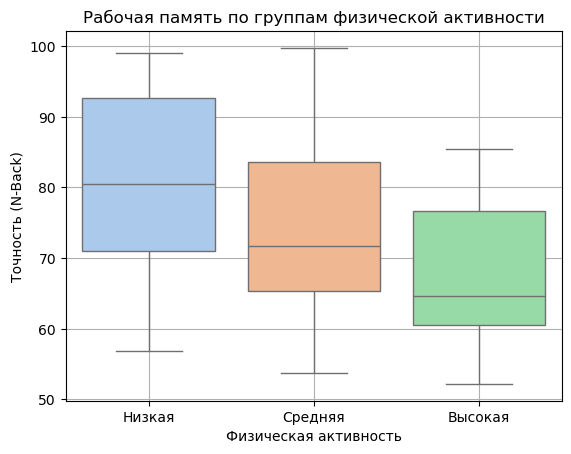

In [6]:
df['Activity_Level_Group'] = pd.cut(df['Physical_Activity_Level'],
                                    bins=[-1, 3, 6, 10],
                                    labels=['–ù–∏–∑–∫–∞—è', '–°—Ä–µ–¥–Ω—è—è', '–í—ã—Å–æ–∫–∞—è'])

sns.boxplot(data=df, x='Activity_Level_Group', y='N_Back_Accuracy', palette='pastel')
plt.title("–†–∞–±–æ—á–∞—è –ø–∞–º—è—Ç—å –ø–æ –≥—Ä—É–ø–ø–∞–º —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏")
plt.xlabel("–§–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å")
plt.ylabel("–¢–æ—á–Ω–æ—Å—Ç—å (N-Back)")
plt.grid(True)
plt.show()



–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, —É –≤—ã—Å–æ–∫–æ–∞–∫—Ç–∏–≤–Ω—ã—Ö —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∏–∂–µ –≤—Å–µ–≥–æ. –ü—Ä–æ–≤–µ—Ä–∏–º –¥–ª—è –Ω–∞—á–∞–ª–∞ —Å–≤—è–∑—å –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å - —É—Ç–æ–º–ª–µ–Ω–∏–µ, –ø–æ—Ç–æ–º 
—É—Ç–æ–º–ª–µ–Ω–∏–µ - N-Back, —á—Ç–æ–±—ã –ø–æ–¥—Ç–≤–µ—Ä–¥–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É. –î–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—Ç—Ä–æ—é —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—É—é –º–æ–¥–µ–ª—å:


In [8]:
import statsmodels.api as sm

X = df[['Physical_Activity_Level']]
X = sm.add_constant(X)
y = df['Daytime_Sleepiness']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Daytime_Sleepiness   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.08907
Date:                Wed, 04 Jun 2025   Prob (F-statistic):              0.767
Time:                        09:50:58   Log-Likelihood:                -136.75
No. Observations:                  39   AIC:                             277.5
Df Residuals:                      37   BIC:                             280.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     


–í—ã–≤–æ–¥: –ì–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ –≤—ã—Å–æ–∫–∞—è —Ñ–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –≤—ã–∑—ã–≤–∞–µ—Ç —É—Ç–æ–º–ª–µ–Ω–∏–µ (—Å–æ–Ω–ª–∏–≤–æ—Å—Ç—å), 
–Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è. –ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ–π —Å–≤—è–∑–∏
–ü—Ä–æ–≤–µ—Ä—é, –æ—Å—Ç–∞—ë—Ç—Å—è –ª–∏ —Å–≤—è–∑—å –ø—Ä–∏ –∫–æ–Ω—Ç—Ä–æ–ª–µ –¥—Ä—É–≥–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö


In [10]:
X = df[['Physical_Activity_Level', 'Sleep_Hours', 'Stress_Level', 'Caffeine_Intake']]
X = sm.add_constant(X)
y = df['N_Back_Accuracy']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        N_Back_Accuracy   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.124
Date:                Wed, 04 Jun 2025   Prob (F-statistic):             0.0992
Time:                        09:50:58   Log-Likelihood:                -152.52
No. Observations:                  39   AIC:                             315.0
Df Residuals:                      34   BIC:                             323.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     


–≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —Ñ–∏–∑. –Ω–∞–≥—Ä—É–∑–∫–∞ –≤–ª–∏—è–µ—Ç –Ω–∞–ø—Ä—è–º—É—é –∏, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –º–µ–¥–∏–∞—Ç–æ—Ä–æ–≤ –≤ —ç—Ç–æ–π —Å–≤—è–∑–∏ –Ω–µ—Ç.

–ü–æ–ø—Ä–æ–±—É–µ–º –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —Å—É–±–≥—Ä—É–ø–ø—ã.
–î–ª—è —ç—Ç–æ–≥–æ –ø—Ä–æ–≤–µ–¥—É –º–Ω–æ–≥–æ—Ñ–∞–∫—Ç–æ—Ä–Ω—É—é —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é, –∞ –∑–∞—Ç–µ–º - –ø—Ä–æ–≤–µ—Ä—é N-Back Accuracy –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–π 


In [12]:
# –°–æ–∑–¥–∞–º –≥—Ä—É–ø–ø–∏—Ä–æ–≤–æ—á–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

# –ü–æ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
df['Activity_Group'] = pd.cut(
    df['Physical_Activity_Level'],
    bins=[-0.1, 5, 11],
    labels=['–ù–∏–∑–∫–∞—è', '–í—ã—Å–æ–∫–∞—è']
)

# –ü–æ —É—Ä–æ–≤–Ω—é —Å—Ç—Ä–µ—Å—Å–∞
df['Stress_Group'] = pd.cut(
    df['Stress_Level'],
    bins=[0, 20, 40],
    labels=['–ù–∏–∑–∫–∏–π —Å—Ç—Ä–µ—Å—Å', '–í—ã—Å–æ–∫–∏–π —Å—Ç—Ä–µ—Å—Å']
)

# –ü–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[0, 17, 25, 45, 100],
    labels=['–ü–æ–¥—Ä–æ—Å—Ç–∫–∏', '–ú–æ–ª–æ–¥—ã–µ', '–í–∑—Ä–æ—Å–ª—ã–µ', '–ü–æ–∂–∏–ª—ã–µ']
)

# –û–±—ä–µ–¥–∏–Ω–∏–º –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –æ–¥–Ω—É –∫–æ–ª–æ–Ω–∫—É
df['Subgroup'] = (
    df['Activity_Group'].astype(str) + ' | ' +
    df['Stress_Group'].astype(str) + ' | ' +
    df['Gender'].astype(str) + ' | ' +
    df['Age_Group'].astype(str)
)

# –ü—Ä–æ–≤–µ—Ä–∏–º —Å—Ä–µ–¥–Ω–µ–µ N-Back Accuracy –ø–æ –≥—Ä—É–ø–ø–∞–º
group_accuracy = df.groupby('Subgroup')['N_Back_Accuracy'].mean().sort_values(ascending=False)
print(group_accuracy)


Subgroup
–í—ã—Å–æ–∫–∞—è | –í—ã—Å–æ–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Female | –í–∑—Ä–æ—Å–ª—ã–µ    99.730000
–ù–∏–∑–∫–∞—è | –ù–∏–∑–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Male | –ú–æ–ª–æ–¥—ã–µ         96.500000
–ù–∏–∑–∫–∞—è | –ù–∏–∑–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Female | –ú–æ–ª–æ–¥—ã–µ       87.500000
–ù–∏–∑–∫–∞—è | –ù–∏–∑–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Female | –í–∑—Ä–æ—Å–ª—ã–µ      84.956667
–ù–∏–∑–∫–∞—è | –í—ã—Å–æ–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Male | –í–∑—Ä–æ—Å–ª—ã–µ       82.452500
–í—ã—Å–æ–∫–∞—è | –ù–∏–∑–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Female | –í–∑—Ä–æ—Å–ª—ã–µ     78.600000
–ù–∏–∑–∫–∞—è | –í—ã—Å–æ–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Female | –ú–æ–ª–æ–¥—ã–µ      77.280000
–í—ã—Å–æ–∫–∞—è | –ù–∏–∑–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Male | –ú–æ–ª–æ–¥—ã–µ        74.435000
–í—ã—Å–æ–∫–∞—è | –ù–∏–∑–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Female | –ú–æ–ª–æ–¥—ã–µ      73.500000
–í—ã—Å–æ–∫–∞—è | –ù–∏–∑–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Male | –í–∑—Ä–æ—Å–ª—ã–µ       71.126667
–ù–∏–∑–∫–∞—è | –ù–∏–∑–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Male | –í–∑—Ä–æ—Å–ª—ã–µ        70.426250
–ù–∏–∑–∫–∞—è | –í—ã—Å–æ–∫–∏–π —Å—Ç—Ä–µ—Å—Å | Male | –ú–æ–ª–æ–¥—ã

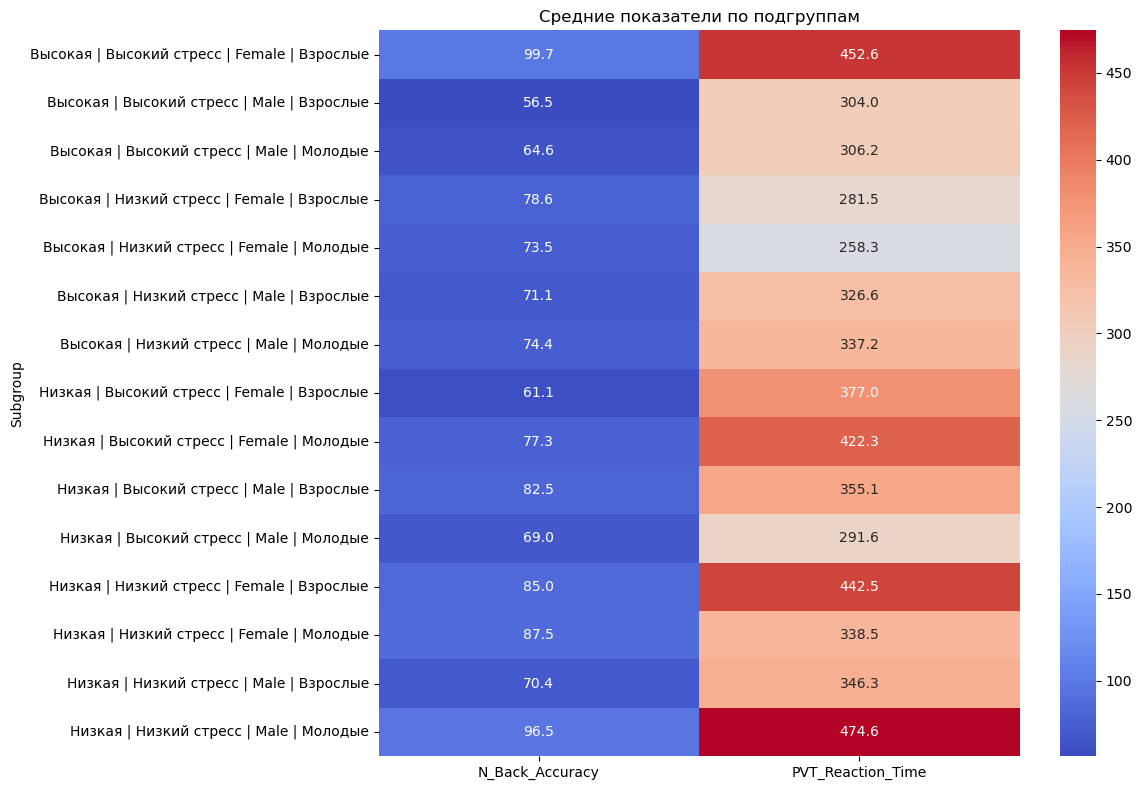

In [13]:
grouped = df.groupby('Subgroup')[[
    'N_Back_Accuracy', 'PVT_Reaction_Time'
]].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(grouped, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("–°—Ä–µ–¥–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø–æ –ø–æ–¥–≥—Ä—É–ø–ø–∞–º")
plt.tight_layout()
plt.show()



–ü—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–π –≤—ã–≤–æ–¥:
–ì–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ –≤—ã—Å–æ–∫–∞—è —Ñ–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —É—Ö—É–¥—à–∞–µ—Ç –≤–Ω–∏–º–∞–Ω–∏–µ —á–µ—Ä–µ–∑ —É—Ç–æ–º–ª–µ–Ω–∏–µ ‚Äî –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å.  
–†–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –Ω–µ –≤—ã—è–≤–∏–ª —Å–≤—è–∑–∏ –º–µ–∂–¥—É –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é –∏ —Å–æ–Ω–ª–∏–≤–æ—Å—Ç—å—é.  
–ü—Ä–∏ —ç—Ç–æ–º —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –ø—Ä—è–º–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å –º–µ–∂–¥—É –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é –∏ —Ç–æ—á–Ω–æ—Å—Ç—å—é –≤–Ω–∏–º–∞–Ω–∏—è (N_Back_Accuracy).  

–û–¥–Ω–∞–∫–æ –∞–Ω–∞–ª–∏–∑ –ø–æ–¥–≥—Ä—É–ø–ø –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–æ—á–µ—Ç–∞–Ω–∏—è—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, —É –∂–µ–Ω—â–∏–Ω —Å –≤—ã—Å–æ–∫–∏–º —É—Ä–æ–≤–Ω–µ–º –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∏ 
—Å—Ç—Ä–µ—Å—Å–∞) –≤–Ω–∏–º–∞–Ω–∏–µ –¥–∞–∂–µ –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ.  
–≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ –≤–ª–∏—è–Ω–∏–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –Ω–µ–æ–¥–Ω–æ—Ä–æ–¥–Ω–æ –∏ –º–æ–∂–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç –ª–∏—á–Ω—ã—Ö 
–∏ –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤.



–°–ª–µ–¥—É—é—â–µ–µ –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏–µ:
- —É –ª—é–¥–µ–π —Å –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π –º–∞—Å—Å–æ–π —Ç–µ–ª–∞ —Ö—É–∂–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞
- —á–µ–º –≤—ã—à–µ –º–∞—Å—Å–∞ —Ç–µ–ª–∞ (–≤—ã—à–µ –Ω–æ—Ä–º—ã), —Ç–µ–º –ª—É—á—à–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞ 


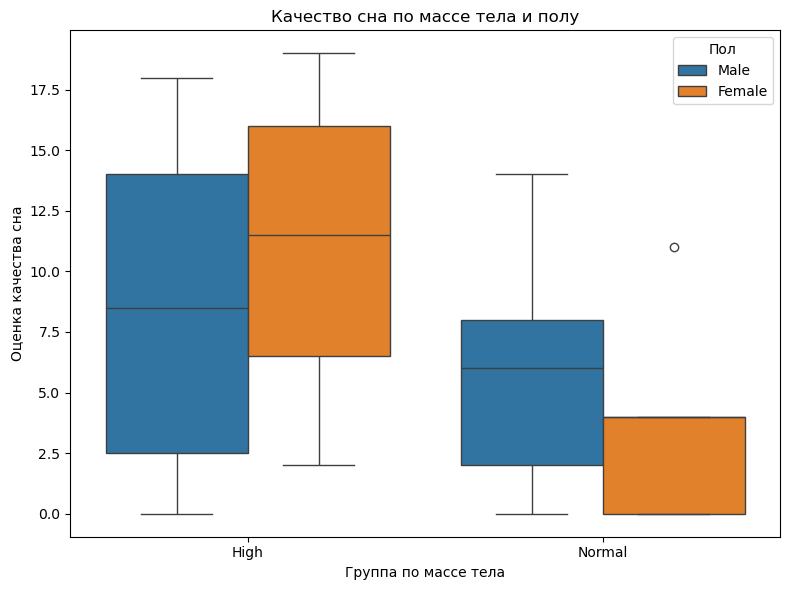

In [26]:
# –°–æ–∑–¥–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π BMI_Group
def get_bmi_group(row):
    if row['BMI_High'] == 1:
        return 'High'
    elif row['BMI_Normal'] == 1:
        return 'Normal'

df['BMI_Group'] = df.apply(get_bmi_group, axis=1)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='BMI_Group', y='Sleep_Quality_Score', hue='Gender')
plt.title("–ö–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞ –ø–æ –º–∞—Å—Å–µ —Ç–µ–ª–∞ –∏ –ø–æ–ª—É")
plt.xlabel("–ì—Ä—É–ø–ø–∞ –ø–æ –º–∞—Å—Å–µ —Ç–µ–ª–∞")
plt.ylabel("–û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞")
plt.legend(title="–ü–æ–ª")
plt.tight_layout()
plt.show()


–£ –ª—é–¥–µ–π —Å –≤—ã—Å–æ–∫–∏–º BMI (–∏–∑–±—ã—Ç–æ—á–Ω—ã–π –≤–µ—Å):
  -  –ö–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞ –≤—ã—à–µ, —á–µ–º —É —Ç–µ—Ö, —É –∫–æ–≥–æ –≤–µ—Å –≤ –Ω–æ—Ä–º–µ. –≠—Ç–æ –≤–µ—Ä–Ω–æ –∫–∞–∫ –¥–ª—è –º—É–∂—á–∏–Ω, —Ç–∞–∫ –∏ –¥–ª—è –∂–µ–Ω—â–∏–Ω
  -  –í —Ü–µ–ª–æ–º, –º—É–∂—á–∏–Ω—ã —Å–ø—è—Ç –ª—É—á—à–µ, —á–µ–º –∂–µ–Ω—â–∏–Ω—ã


In [ ]:
features = ['Stress_Level', 'Caffeine_Intake', 'Physical_Activity_Level', 'Sleep_Hours']

for feature in features:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x='Gender', y=feature, palette='Set2')
    plt.title(f'{feature} –ø–æ –ø–æ–ª—É')
    plt.xlabel("–ü–æ–ª")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()



–¢–æ –µ—Å—Ç—å, –Ω–∞ —Ç–∞–∫–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –ø–æ–≤–ª–∏—è–ª–æ —Ç–æ, —á—Ç–æ: 
- –º—É–∂—á–∏–Ω—ã –∏—Å–ø—ã—Ç—ã–≤–∞—é—Ç –≤ —Å—Ä–µ–¥–Ω–µ–º –±–æ–ª—å—à–µ —Å—Ç—Ä–µ—Å—Å–∞, —á–µ–º –∂–µ–Ω—â–∏–Ω—ã, –ø–æ—ç—Ç–æ–º—É –º–æ–≥—É—Ç —Å–∏–ª—å–Ω–µ–µ —É—Ç–æ–º–ª—è—Ç—å—Å—è; 
- –∂–µ–Ω—â–∏–Ω—ã –ø—å—é—Ç –∫–æ—Ñ–µ –±–æ–ª—å—à–µ, –ø–æ—ç—Ç–æ–º—É –∏—Ö –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞ —Ö—É–∂–µ; 
- —É –º—É–∂—á–∏–Ω –±–æ–ª—å—à–µ —Ñ–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å - –æ–Ω–∏ –±–æ–ª—å—à–µ —É—Å—Ç–∞—é—Ç; 
- –∏ —É –∂–µ–Ω—â–∏–Ω –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∞–º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ —á–∞—Å–æ–≤ —Å–Ω–∞ - –º–µ–Ω—å—à–µ –Ω–æ—Ä–º—ã, –∫–æ–≥–¥–∞ —É –º—É–∂—á–∏–Ω –≤ —Å—Ä–µ–¥–Ω–µ–º 6 —á–∞—Å–æ–≤. 

–ò–∑ —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ –ø–æ–Ω—è—Ç—å, –ø–æ—á–µ–º—É –º–æ–∂–µ—Ç –≤–æ–∑–Ω–∏–∫–∞—Ç—å —Ä–∞–∑–Ω–∏—Ü–∞ –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Å–Ω–∞ –º–µ–∂–¥—É –º—É–∂—á–∏–Ω–∞–º–∏ –∏ –∂–µ–Ω—â–∏–Ω–∞–º–∏. 


In [ ]:
import statsmodels.api as sm

for gender in ['Male', 'Female']:
    sub = df[df['Gender'] == gender][['BMI_Group', 'Sleep_Quality_Score']].dropna()

    X = pd.get_dummies(sub['BMI_Group'], drop_first=True)
    X = sm.add_constant(X)
    y = sub['Sleep_Quality_Score']

    # –ü—Ä–∏–≤–æ–¥–∏–º —Ç–∏–ø—ã –∫ float
    X = X.astype(float)
    y = y.astype(float)

    model = sm.OLS(y, X).fit()
    print(f"\n–†–µ–≥—Ä–µ—Å—Å–∏—è –¥–ª—è –ø–æ–ª–∞: {gender}")
    print(model.summary())




–Ø –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª–∞ –æ–±—ä—è—Å–Ω–∏—Ç—å —Ç–µ–ø–µ—Ä—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–∞—Å—Å—ã —Ç–µ–ª–∞ –∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Å–Ω–∞, –Ω–æ —Ö–æ—Ç—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö —É–∫–∞–∑—ã–≤–∞–ª–∏ –Ω–∞ 
–≤–æ–∑–º–æ–∂–Ω—É—é —Å–≤—è–∑—å –º–µ–∂–¥—É –º–∞—Å—Å–æ–π —Ç–µ–ª–∞ –∏ –∫–∞—á–µ—Å—Ç–≤–æ–º —Å–Ω–∞, —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö 
—Ä–∞–∑–ª–∏—á–∏–π. –í–æ–∑–º–æ–∂–Ω–æ, –Ω–∞–±–ª—é–¥–∞–µ–º–∞—è —Å–≤—è–∑—å –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–∞ –¥—Ä—É–≥–∏–º–∏ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏ –∏–ª–∏ —Å–ª—É—á–∞–π–Ω–∞. –≠—Ç–∞ –≥–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–ª—É—á–∏–ª–∞ 
—É–±–µ–¥–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è


**–ü–æ–ø—Ä–æ–±—É—é —Å–æ–∑–¥–∞—Ç—å –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–π –¥–∞—à–±–æ—Ä–¥ –Ω–∞ Streamlit, –≥–¥–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å —Å–º–æ–∂–µ—Ç –≤–≤–µ—Å—Ç–∏ —Å–≤–æ–∏ –¥–∞–Ω–Ω—ã–µ, –ø–æ–ª—É—á–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–æ–¥–µ–ª—å—é –µ–≥–æ –∫–æ–≥–Ω–∏—Ç–∏–≤–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∏ –∑–∞—Ç–µ–º –ø–æ–ª—É—á–∏—Ç—å —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ –∏—Ö —É–ª—É—á—à–µ–Ω–∏—é.**

–î–ª—è —ç—Ç–æ–≥–æ —Å–Ω–∞—á–∞–ª–∞ –Ω–∞–π–¥—É —Ç–∞–∫–∏–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ —á–∞—Å–æ–≤ —Å–Ω–∞, –≤—ã–ø–∏—Ç—ã—Ö —á–∞—à–µ–∫ –∫–æ—Ñ–µ –∏ —á–∞—Å–æ–≤ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É—é—Ç –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞, –≤—Ä–µ–º—è —Ä–µ–∞–∫—Ü–∏–∏, —Ä–∞–±–æ—á—É—é –ø–∞–º—è—Ç—å –∏ –≤–Ω–∏–º–∞–Ω–∏–µ.


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
df = pd.read_csv("updated_data.csv")

# –í—ã–±–∏—Ä–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
features = ['Sleep_Hours', 'Caffeine_Intake', 'Physical_Activity_Level', 'BMI', 'Age']
targets = ['PVT_Reaction_Time', 'N_Back_Accuracy', 'Stroop_Task_Reaction_Time']

# –£–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
df = df.dropna(subset=features + targets)

# –î–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ
X = df[features]
y = df[targets]

# –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏ Ridge –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∞
models = {}
for col in y.columns:
    model = Ridge(alpha=1.0)
    model.fit(X_scaled, y[col])
    models[col] = model

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
sleep_range = np.linspace(3, 10, 20)
coffee_range = np.linspace(0, 5, 10)
activity_range = np.linspace(0, 10, 10)

# –§–∏–∫—Å–∏—Ä—É–µ–º –≤–æ–∑—Ä–∞—Å—Ç –∏ BMI
age = 30
bmi = 22

grid = []
for sleep in sleep_range:
    for coffee in coffee_range:
        for activity in activity_range:
            grid.append([sleep, coffee, activity, bmi, age])

df_grid = pd.DataFrame(grid, columns=features)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –Ω–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ
X_grid_scaled = scaler.transform(df_grid)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø–æ –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏
for target in targets:
    df_grid[target] = models[target].predict(X_grid_scaled)

# –í—ã–≤–æ–¥ –ª—É—á—à–∏—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –ø–æ –ø–∞–º—è—Ç–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä)
top_combos = df_grid.sort_values(by='N_Back_Accuracy', ascending=False).head(10)
print(top_combos[['Sleep_Hours', 'Caffeine_Intake', 'Physical_Activity_Level', 'N_Back_Accuracy']])

In [ ]:

#–°–æ–∑–¥–∞–¥–∏–º —Ñ–∞–π–ª app.py –∏ –≤—Å—Ç–∞–≤–∏–º –∫–æ–¥

code = """import streamlit as st
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# –ó–∞–≥–æ–ª–æ–≤–æ–∫
st.title("–û—Ü–µ–Ω–∫–∞ –∫–æ–≥–Ω–∏—Ç–∏–≤–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π")

st.markdown("–í–≤–µ–¥–∏—Ç–µ —Å–≤–æ–∏ –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –ø—Ä–æ–≥–Ω–æ–∑ –∫–æ–≥–Ω–∏—Ç–∏–≤–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏.")

# –í–≤–æ–¥ –¥–∞–Ω–Ω—ã—Ö
age = st.number_input("–í–æ–∑—Ä–∞—Å—Ç", min_value=10, max_value=100, step=1)
gender = st.selectbox("–ü–æ–ª", ["Male", "Female"])
height_cm = st.number_input("–†–æ—Å—Ç (–≤ —Å–º)", min_value=100, max_value=250, step=1)
weight_kg = st.number_input("–í–µ—Å (–≤ –∫–≥)", min_value=30, max_value=200, step=1)
sleep_hours = st.slider("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–∞—Å–æ–≤ —Å–Ω–∞ –≤ —Å—É—Ç–∫–∏", 0.0, 12.0, 7.0, step=0.1)
caffeine = st.slider("–ö–æ—Ñ–µ–∏–Ω (–∫–æ–ª-–≤–æ –∫—Ä—É–∂–µ–∫ –∫–æ—Ñ–µ –≤ –¥–µ–Ω—å)", 0, 10, 2)
activity = st.slider("–§–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å (—á–∞—Å—ã –≤ –Ω–µ–¥–µ–ª—é)", 0.0, 20.0, 3.0, step=0.5)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ BMI
height_m = height_cm / 100
bmi = weight_kg / (height_m ** 2)
bmi_category = "–ù–æ—Ä–º–∞–ª—å–Ω—ã–π"
if bmi < 18.5:
    bmi_category = "–ù–µ–¥–æ–≤–µ—Å"
elif bmi > 25:
    bmi_category = "–ò–∑–±—ã—Ç–æ—á–Ω—ã–π"

st.markdown(f"**–í–∞—à –ò–ú–¢ (BMI):** {bmi:.1f} ‚Äî *{bmi_category}*")

# –°–æ–∑–¥–∞–Ω–∏–µ DataFrame
X_input = pd.DataFrame({
    "Sleep_Hours": [sleep_hours],
    "Caffeine_Intake": [caffeine],
    "Physical_Activity_Level": [activity],
    "BMI": [bmi],
    "Age": [age]
})

# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –º–æ–¥–µ–ª–∏ (—É–ø—Ä–æ—â—ë–Ω–Ω–æ: –æ–±—É—á–∞–µ–º –≤ –∫–æ–¥–µ)
# –ü—Ä–∏–º–µ—Ä –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö ‚Äî –ø–æ–¥–º–µ–Ω–∏—Ç—å —Å–≤–æ–∏–º–∏ –≤ —Ä–∞–±–æ—á–µ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏
X_fake = pd.DataFrame({
    "Sleep_Hours": np.random.uniform(4, 9, 100),
    "Caffeine_Intake": np.random.randint(0, 6, 100),
    "Physical_Activity_Level": np.random.uniform(0, 10, 100),
    "BMI": np.random.uniform(18, 35, 100),
    "Age": np.random.randint(18, 65, 100)
})

y_fake = pd.DataFrame({
    "Daytime_Sleepiness": np.random.uniform(0, 24, 100),
    "Stroop_Task_Reaction_Time": np.random.uniform(2, 5, 100),
    "N_Back_Accuracy": np.random.uniform(50, 100, 100),
    "PVT_Reaction_Time": np.random.uniform(250, 500, 100)
})

# –ú–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_fake)
X_input_scaled = scaler.transform(X_input)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏
models = {
    'Daytime_Sleepiness': Ridge().fit(X_scaled, y_fake['Daytime_Sleepiness']),
    'Stroop': Ridge().fit(X_scaled, y_fake['Stroop_Task_Reaction_Time']),
    'N_Back': Ridge().fit(X_scaled, y_fake['N_Back_Accuracy']),
    'PVT': Ridge().fit(X_scaled, y_fake['PVT_Reaction_Time'])
}

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
preds = {name: model.predict(X_input_scaled)[0] for name, model in models.items()}

# –í—ã–≤–æ–¥
st.subheader("–ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º—ã–µ –∫–æ–≥–Ω–∏—Ç–∏–≤–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏:")
st.write(f"**–î–Ω–µ–≤–Ω–∞—è —Å–æ–Ω–ª–∏–≤–æ—Å—Ç—å:** {preds['Daytime_Sleepiness']:.1f}")
st.write(f"**–í—Ä–µ–º—è —Ä–µ–∞–∫—Ü–∏–∏ (Stroop):** {preds['Stroop']:.2f} —Å–µ–∫")
st.write(f"**–¢–æ—á–Ω–æ—Å—Ç—å –ø–∞–º—è—Ç–∏ (N-Back Accuracy):** {preds['N_Back']:.1f}%")
st.write(f"**–í—Ä–µ–º—è —Ä–µ–∞–∫—Ü–∏–∏ (PVT):** {preds['PVT']:.0f} –º—Å")

# –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏
st.subheader("üí¨ –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:")

all_ok = True

# –°–æ–Ω
if sleep_hours < 6:
    st.warning("–í—ã —Å–ø–∏—Ç–µ –º–µ–Ω—å—à–µ 6 —á–∞—Å–æ–≤. –£–≤–µ–ª–∏—á—å—Ç–µ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞ –¥–æ 6‚Äì9 —á–∞—Å–æ–≤ –¥–ª—è –ª—É—á—à–µ–π –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏–∏ –∏ —Ä–µ–∞–∫—Ü–∏–∏.")
    all_ok = False
elif sleep_hours > 9:
    st.warning("–í—ã —Å–ø–∏—Ç–µ –±–æ–ª—å—à–µ 9 —á–∞—Å–æ–≤. –°–ª–∏—à–∫–æ–º –¥–ª–∏–Ω–Ω—ã–π —Å–æ–Ω –º–æ–∂–µ—Ç –≤—ã–∑—ã–≤–∞—Ç—å –≤—è–ª–æ—Å—Ç—å. –°—Ç–∞—Ä–∞–π—Ç–µ—Å—å —Å–ø–∞—Ç—å 6‚Äì9 —á–∞—Å–æ–≤.")
    all_ok = False

# –ò–ú–¢
if bmi_category == "–ù–µ–¥–æ–≤–µ—Å":
    st.warning("–í–∞—à –≤–µ—Å –Ω–∏–∂–µ –Ω–æ—Ä–º—ã. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –æ—Ç–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å —Ä–∞—Ü–∏–æ–Ω –∏–ª–∏ –ø—Ä–æ–∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è —Å–æ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–º.")
    all_ok = False
elif bmi_category == "–ò–∑–±—ã—Ç–æ—á–Ω—ã–π":
    st.warning("–í–∞—à –≤–µ—Å –≤—ã—à–µ –Ω–æ—Ä–º—ã. –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π BMI ‚Äî 18.5‚Äì25.")
    all_ok = False

# –ö–æ—Ñ–µ–∏–Ω
if caffeine > 3:
    st.warning("–í—ã –ø—å—ë—Ç–µ –º–Ω–æ–≥–æ –∫–æ—Ñ–µ. –û–≥—Ä–∞–Ω–∏—á—å—Ç–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –¥–æ 1‚Äì3 –∫—Ä—É–∂–µ–∫ –≤ –¥–µ–Ω—å ‚Äî —ç—Ç–æ –º–æ–∂–µ—Ç —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Å–Ω–∞.")
    all_ok = False

# –§–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å
if activity < 2:
    st.warning("–ù–∏–∑–∫–∞—è —Ñ–∏–∑–∏—á–µ—Å–∫–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å. –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –º–∏–Ω–∏–º—É–º 2‚Äì6 —á–∞—Å–æ–≤ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤ –Ω–µ–¥–µ–ª—é –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è —Å–Ω–∞ –∏ –∫–æ–≥–Ω–∏—Ç–∏–≤–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π.")
    all_ok = False


if all_ok:
    st.success("–í—Å–µ –∫–ª—é—á–µ–≤—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≤ —Ö–æ—Ä–æ—à–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ! –í–∞—à–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–º —É—Ä–æ–≤–Ω–µ.")


"""

# –ó–∞–ø–∏—Å—ã–≤–∞–µ–º –∫–æ–¥ –≤ —Ñ–∞–π–ª app.py
with open("app.py", "w", encoding="utf-8") as f:
    f.write(code)

print("–§–∞–π–ª app.py —Å–æ–∑–¥–∞–Ω")

